EDA

In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
import numpy as np

Importamos csv despues de relalizar el ETL

In [58]:
steam_games =pd.read_csv('../datasets/steam_games.csv')
user_items = pd.read_csv('../datasets/user_items.csv.gz')
user_reviews = pd.read_csv('../datasets/user_review.csv')

Visualizamos los encabezados

In [59]:
print(steam_games.head(0))
print(user_items.head(0))
print(user_reviews.head(0))

Empty DataFrame
Columns: [publisher, genres, app_name, title, release_date, price, id, year]
Index: []
Empty DataFrame
Columns: [item_id, user_id, playtime_forever]
Index: []
Empty DataFrame
Columns: [user_id, posted, item_id, recommend, sentiment_analysis, year]
Index: []


Combinamos los DF en unos solo

In [60]:
merge = pd.merge(steam_games,pd.merge(user_items, user_reviews, left_on="user_id", right_on='user_id') ,left_on='id', right_on='item_id_x' )

In [61]:
merge.head(0)

,publisher,genres,app_name,title,release_date,price,id,year_x,item_id_x,user_id,playtime_forever,posted,item_id_y,recommend,sentiment_analysis,year_y


Cambiamos los nombres de las columnas y eliminamos las columnas repetidas

In [62]:
merge.drop(columns=['item_id_y', 'id'], axis=1, inplace=True)

In [63]:
merge.rename(columns={'year_x': 'year_release', 'item_id_x': 'item_id', 'year_y':'year_posted'}, inplace=True)

In [64]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6101656 entries, 0 to 6101655
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   publisher           object 
 1   genres              object 
 2   app_name            object 
 3   title               object 
 4   release_date        object 
 5   price               float64
 6   year_release        float64
 7   item_id             int64  
 8   user_id             object 
 9   playtime_forever    float64
 10  posted              object 
 11  recommend           bool   
 12  sentiment_analysis  int64  
 13  year_posted         float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 611.0+ MB


In [65]:
(merge['app_name']==merge['title']).value_counts()# verificamos la informacion de la columna app_name 

True     6004293
False      97363
Name: count, dtype: int64

ya que la inforcion en su mayoria es igual en las dos columnas se procede a descartar la columna app_name

In [66]:
merge.drop('app_name', axis=1, inplace=True)

La columna release_data no se usara en el analisis ya que todas las fechas no estan en el formato correcto y se hara el analisis por año en year_release igual para las columnas posted y year posted

In [67]:
merge.drop(columns=['release_date', 'posted'], axis=1, inplace=True)

Convierto las colu,nas years a Datatime

In [68]:
# Convertir la columna 'year_release' a tipo datetime
merge['year_release'] = pd.to_datetime(merge['year_release'], format='%Y', errors='coerce')
merge['year_posted'] = pd.to_datetime(merge['year_posted'], format='%Y', errors='coerce')

Información general del DataFrame

In [69]:
print(merge.head())
merge.info()

             publisher                         genres                 title  \
0  Stainless Games Ltd  ['Action', 'Indie', 'Racing']  Carmageddon Max Pack   
1  Stainless Games Ltd  ['Action', 'Indie', 'Racing']  Carmageddon Max Pack   
2  Stainless Games Ltd  ['Action', 'Indie', 'Racing']  Carmageddon Max Pack   
3  Stainless Games Ltd  ['Action', 'Indie', 'Racing']  Carmageddon Max Pack   
4  Stainless Games Ltd  ['Action', 'Indie', 'Racing']  Carmageddon Max Pack   

   price year_release  item_id   user_id  playtime_forever  recommend  \
0   9.99   1997-01-01   282010  UTNerd24               5.0       True   
1   9.99   1997-01-01   282010  UTNerd24               5.0       True   
2   9.99   1997-01-01   282010  UTNerd24               5.0       True   
3   9.99   1997-01-01   282010  UTNerd24               5.0       True   
4   9.99   1997-01-01   282010  UTNerd24               5.0       True   

   sentiment_analysis year_posted  
0                   2  2014-01-01  
1             

Resumen estadístico

In [70]:
merge.describe(include='all') 

,publisher,genres,title,price,year_release,item_id,user_id,playtime_forever,recommend,sentiment_analysis,year_posted
count,6099319,6101656,6101656,6.101656e+06,6101656,6.101656e+06,6101656,6.101656e+06,6101656,6.101656e+06,5096012
unique,4011,1253,8373,NaN,NaN,NaN,22576,NaN,2,NaN,NaN
top,Valve,"['Action', 'Adventure']",Garry's Mod,NaN,NaN,NaN,phrostb,NaN,True,NaN,NaN
freq,384067,563877,44807,NaN,NaN,NaN,56367,NaN,5313568,NaN,NaN
mean,NaN,NaN,NaN,1.212744e+01,2011-05-31 18:34:12.165245952,1.865248e+05,NaN,9.352246e+02,NaN,1.454952e+00,2014-01-12 04:11:59.167538176
min,NaN,NaN,NaN,0.000000e+00,1983-01-01 00:00:00,1.000000e+01,NaN,0.000000e+00,NaN,0.000000e+00,2010-01-01 00:00:00
25%,NaN,NaN,NaN,4.990000e+00,2010-01-01 00:00:00,3.548000e+04,NaN,0.000000e+00,NaN,1.000000e+00,2014-01-01 00:00:00
50%,NaN,NaN,NaN,9.990000e+00,2013-01-01 00:00:00,2.199500e+05,NaN,4.500000e+01,NaN,2.000000e+00,2014-01-01 00:00:00
75%,NaN,NaN,NaN,1.999000e+01,2014-01-01 00:00:00,2.862600e+05,NaN,3.360000e+02,NaN,2.000000e+00,2015-01-01 00:00:00
max,NaN,NaN,NaN,7.717100e+02,2018-01-01 00:00:00,5.286600e+05,NaN,6.427730e+05,NaN,2.000000e+00,2015-01-01 00:00:00


In [71]:
merge

,publisher,genres,title,price,year_release,item_id,user_id,playtime_forever,recommend,sentiment_analysis,year_posted
0,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,9.99,1997-01-01,282010,UTNerd24,5.0,True,2,2014-01-01
1,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,9.99,1997-01-01,282010,UTNerd24,5.0,True,1,2015-01-01
2,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,9.99,1997-01-01,282010,UTNerd24,5.0,True,2,2015-01-01
3,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,9.99,1997-01-01,282010,UTNerd24,5.0,True,2,2015-01-01
4,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,9.99,1997-01-01,282010,UTNerd24,5.0,True,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...
6101651,Valve,"['Action', 'Strategy', 'Adventure', 'Simulation']",Counter-Strike: Condition Zero,9.99,2004-01-01,80,943525,0.0,False,1,NaT
6101652,Valve,"['Action', 'Strategy', 'Adventure', 'Simulation']",Counter-Strike: Condition Zero,9.99,2004-01-01,80,76561198312638244,99.0,True,2,NaT
6101653,Valve,"['Action', 'Strategy', 'Adventure', 'Simulation']",Counter-Strike: Condition Zero,9.99,2004-01-01,80,76561198312638244,99.0,True,2,NaT
6101654,Valve,"['Action', 'Strategy', 'Adventure', 'Simulation']",Counter-Strike: Condition Zero,9.99,2004-01-01,80,76561198312638244,99.0,True,2,NaT


Visualizamos como esta compuesta la data, para ello iniciamos graficando el Total de videojuegos por genero

In [72]:
df_merge = merge # para no modificar el df merge se crea el df_merge

In [73]:
# Desglosar las listas en la columna 'genres'
df_merge['genres'] = df_merge['genres'].apply(lambda x: eval(x))  # Convierte la cadena a una lista


In [74]:
# Crear un DataFrame con una fila para cada género
genre = df_merge.explode('genres')

In [75]:
# Contar los videojuegos por género único
genre_counts = genre['genres'].value_counts()

In [76]:
# Calcular el porcentaje
total_videojuegos = genre_counts.sum()
porcentajes = (genre_counts / total_videojuegos) * 100

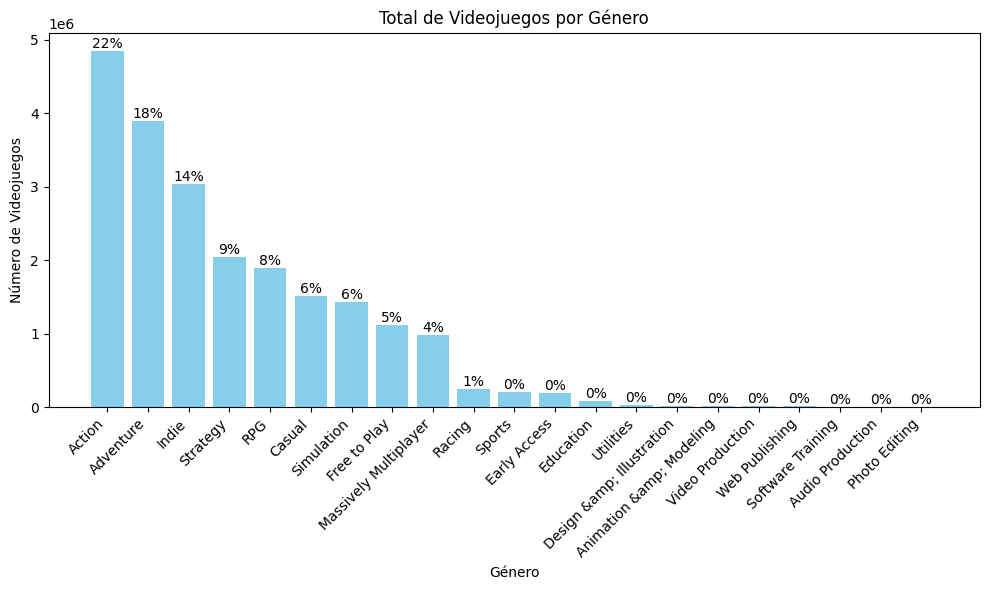

In [77]:
# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(genre_counts.index, genre_counts, color='skyblue')

# Añadir etiquetas con porcentajes
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(porcentaje)}%', ha='center', va='bottom')

plt.title('Total de Videojuegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Videojuegos')
plt.xticks(rotation=45, ha='right')  # Para mejorar la legibilidad de las etiquetas en el eje x
plt.tight_layout()

# Mostrar la gráfica
plt.show()

De esta grafica podemos destacar que el 93 porciendo de los videojuegos pertenecen a 10 generos siendo el genero de Action el que mas se destaca entre todos y los tres principales generos equivalen al 54 porciento de los viedeojuegos

Para continuar con el analisis verifiquemos la Cantidad de lanzaminetos por Año, posteriormente verificaremos los generos mas lanzados y ver si hay alguna ralacion con los generos mas jugados

In [78]:
# Extraer el año de la columna 'year_release'
df_merge['year'] = df_merge['year_release'].dt.year

In [79]:
# Contar la cantidad de lanzamientos por año
release_counts = df_merge['year'].value_counts().sort_index()

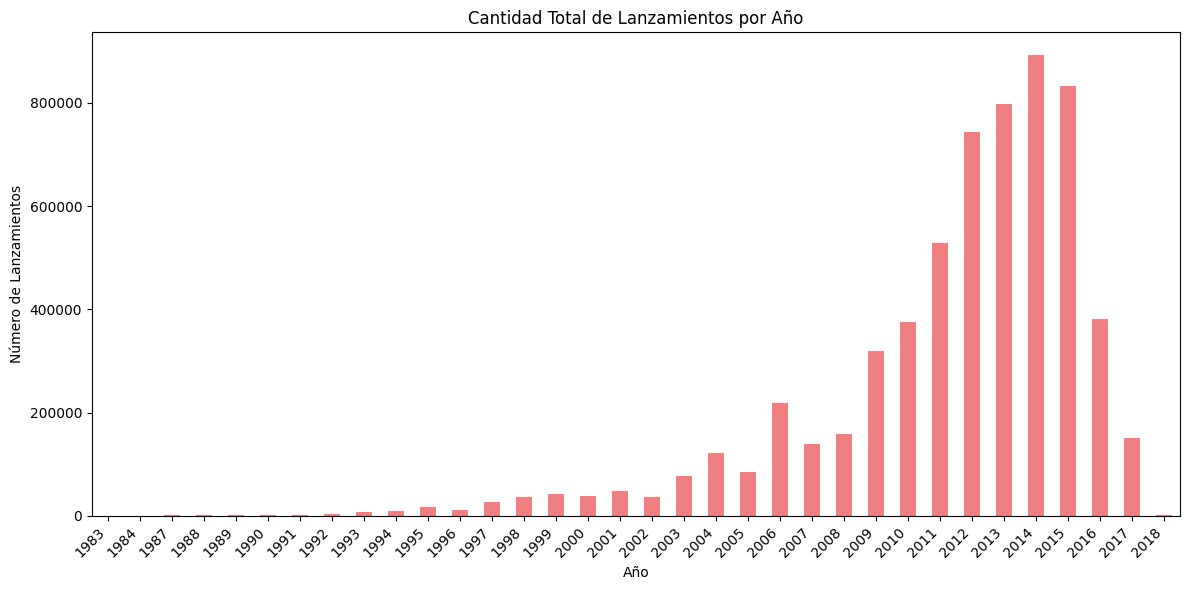

In [80]:
# Crear una gráfica de barras o líneas
plt.figure(figsize=(12, 6))
release_counts.plot(kind='bar', color='lightcoral')  # Cambia 'bar' por 'line' si prefieres una gráfica de líneas
plt.title('Cantidad Total de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.xticks(rotation=45, ha='right')  # Para mejorar la legibilidad de las etiquetas en el eje x
plt.tight_layout()
plt.show()

Con esta grafica evidenciamos que el mayor numero de lanzamientos se da en los ultimos 10 años de la Data es decir ente el 2017 y 2007

In [81]:
# Filtrar los datos para el rango de años de 2007 a 2017
df_filtered = df_merge[(df_merge['year'] >= 2007) & (df_merge['year'] <= 2017)]


In [82]:

# Crear un DataFrame con una fila para cada género
df_genre = df_filtered.explode('genres')

In [83]:
# Contar los lanzamientos por género en el período especificado
genre_counts = df_genre['genres'].value_counts()

In [84]:
# Obtener el top 3 de géneros
top_genres = genre_counts.head(10)

In [85]:
# Calcular el porcentaje
total_lanzamientos = genre_counts.sum()
porcentajes = (genre_counts / total_lanzamientos) * 100

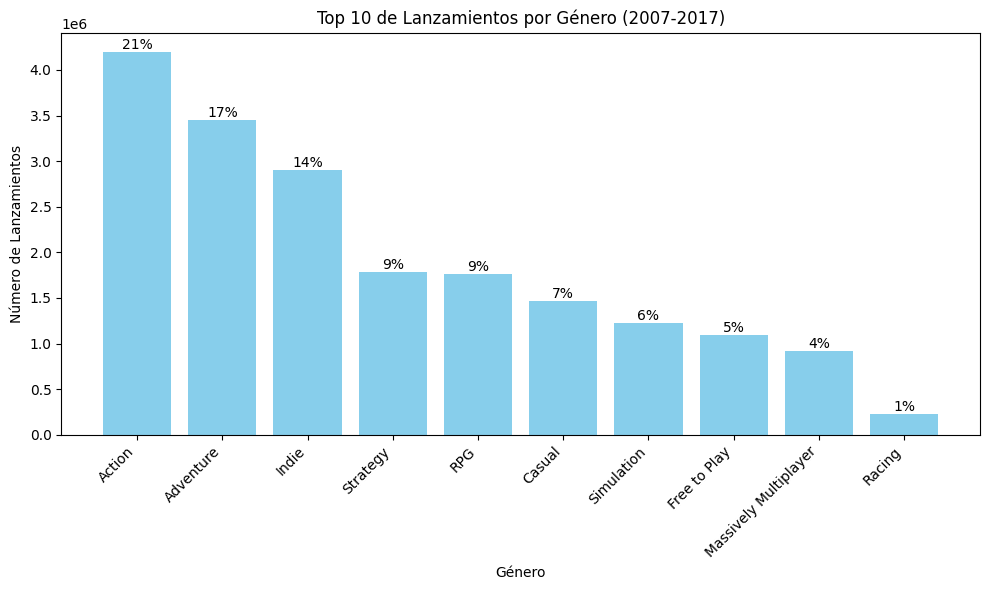

In [86]:
# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_genres.index, top_genres, color='skyblue')

# Añadir etiquetas con porcentajes
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(porcentaje)}%', ha='center', va='bottom')

plt.title('Top 10 de Lanzamientos por Género (2007-2017)')
plt.xlabel('Género')
plt.ylabel('Número de Lanzamientos')
plt.xticks(rotation=45, ha='right')  # Para mejorar la legibilidad de las etiquetas en el eje x
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Con esta grafica podemos decir que en los ultimos 10 años entre el 2007 y 2017 que es el periodo con mayor lanzamientos en el historico de la data, los principales lanzamientos fueron de los generos Action, Adventure e Indie que sumados equivalen al 52% de los lanzamientos, para entender un poco mejor analizaremos las horas jugadas y lo comenterios dejados por las jugadores.

Total Horas Jugadas por genero

In [87]:
# Agrupar por género y año, sumando las horas de juego
genre_playtime = df_genre.groupby(['genres', df_genre['year_posted'].dt.year])['playtime_forever'].sum().reset_index()


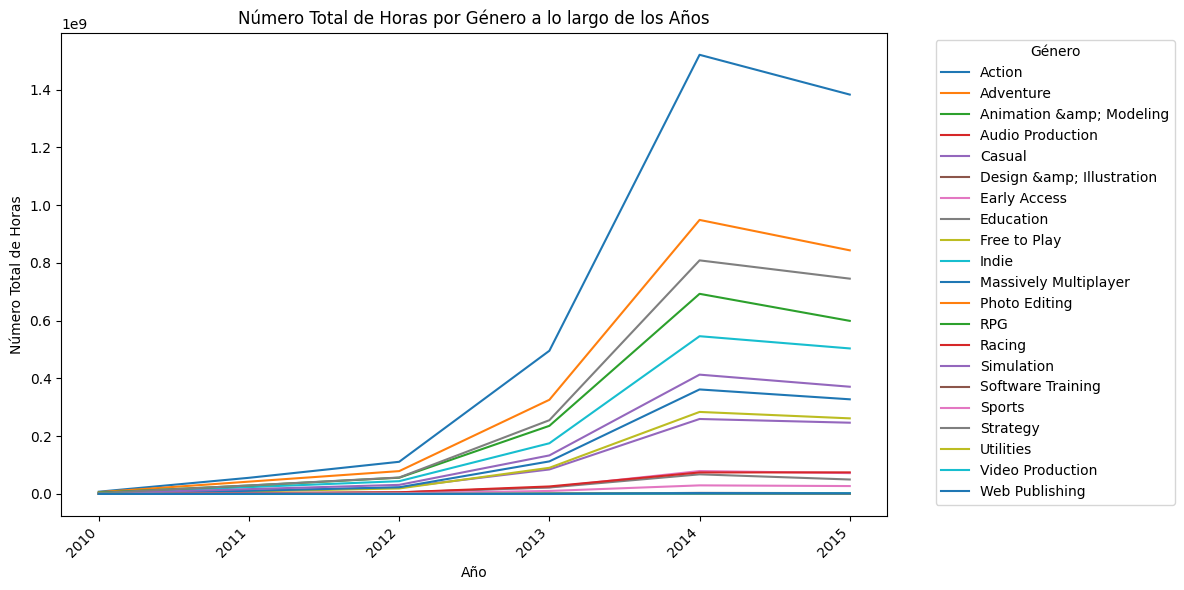

In [88]:
# Crear una gráfica de líneas para cada género
plt.figure(figsize=(12, 6))

for genre in genre_playtime['genres'].unique():
    data = genre_playtime[genre_playtime['genres'] == genre]
    plt.plot(data['year_posted'], data['playtime_forever'], label=genre)

plt.title('Número Total de Horas por Género a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número Total de Horas')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Para mejorar la legibilidad de las etiquetas en el eje x
plt.tight_layout()
plt.show()

La columna 'playtime_forever' solo contiene información de 5 años, pero proporciona una visión valiosa del comportamiento del mercado. Al analizar la gráfica de lanzamientos por género, observamos que el género más jugado es Action, que también es el género con más lanzamientos en este mismo período de años. Le sigue de cerca el género de Aventura. La sorpresa radica en el género de Educación, que no figuraba en el top 10 de lanzamientos, pero se posiciona como el tercer género más jugado. Además, podemos notar que entre 2014 y 2015, según la tendencia de la gráfica, se observa una estabilización y un ligero decrecimiento en las horas de juego. Este comportamiento es similar al de la gráfica de lanzamientos, lo que sugiere la posibilidad de una correlación entre estas dos variables. Será necesario verificar esta relación más a fondo.

Correlacion de horas jugada vs nuemero de lanzamientos

In [89]:
# Filtrar valores cero en playtime_forever
filtre_merge = df_merge[df_merge['playtime_forever'] != 0.0]

In [90]:
# Agrupar por year_posted y contar la cantidad de lanzamientos y sumar las horas jugadas
genre_stats = df_genre.groupby('year_posted').agg({'title': 'count', 'playtime_forever': 'sum'}).reset_index()

In [91]:
# Calcular la correlación
correlation = genre_stats['title'].corr(genre_stats['playtime_forever'])

print(f"Correlación entre el número de horas jugadas y la cantidad de lanzamientos: {correlation}")


Correlación entre el número de horas jugadas y la cantidad de lanzamientos: 0.9986359031885477


El resultado de la correlación, 0.9999, indica una fuerte relación positiva cercana a la perfección (1). Esto sugiere que existe una asociación significativa entre el número de horas jugadas y la cantidad de lanzamientos de videojuegos por género, indicando que a medida que aumenta el número de lanzamientos, tiende a aumentar proporcionalmente el tiempo total de juego.

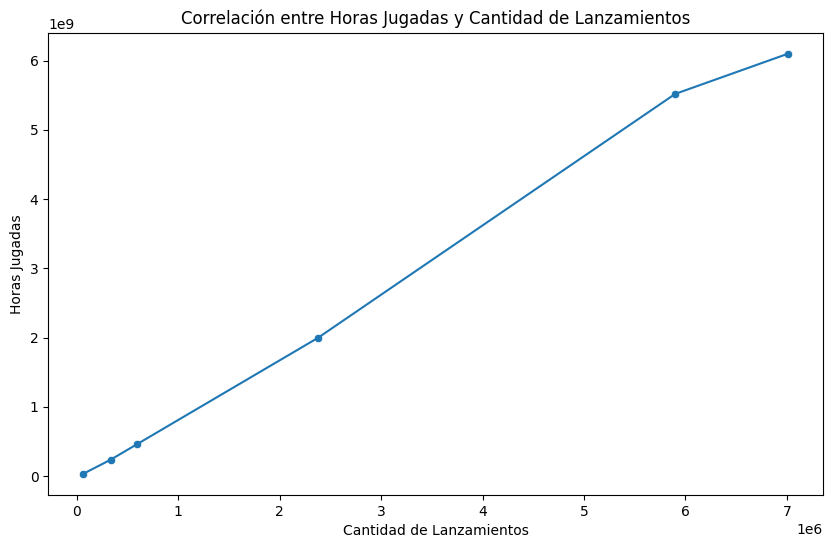

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title', y='playtime_forever', data=genre_stats)
sns.lineplot(x='title', y='playtime_forever', data=genre_stats)
plt.title('Correlación entre Horas Jugadas y Cantidad de Lanzamientos')
plt.xlabel('Cantidad de Lanzamientos')
plt.ylabel('Horas Jugadas')
plt.show()

Graficamente podemos evidenciar la fuerte correlacion entre estas dos variables

Revisemos cuales son las videojuegos mas jugados

In [93]:
df_merge.head(0)

,publisher,genres,title,price,year_release,item_id,user_id,playtime_forever,recommend,sentiment_analysis,year_posted,year


In [94]:
top_games = df_merge.groupby('title')['playtime_forever'].sum().reset_index()#agrupamos los valores por titulo y suma las horaas jugadas

In [95]:
top_games = top_games.sort_values('playtime_forever', ascending=False)#ordenamos de mayor a menor

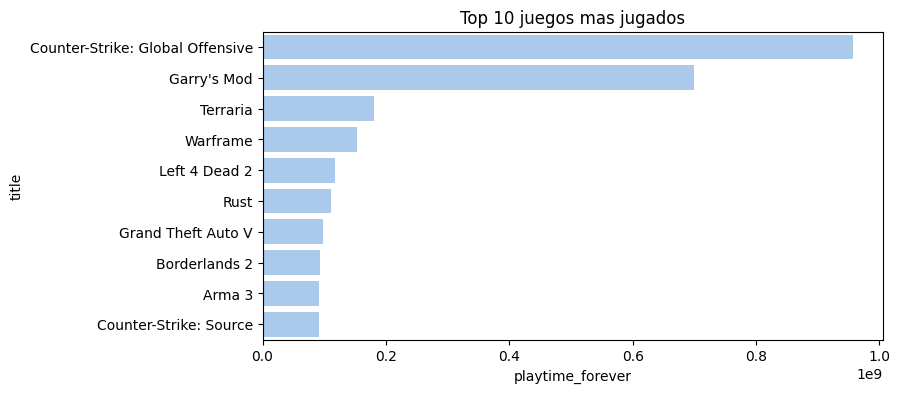

In [98]:
#graficamos 
f, ax = plt.subplots(figsize=(8, 4))
sns.set_color_codes("pastel")
sns.barplot(x="playtime_forever", y="title", data=top_games.head(10),
            color="b")
ax.set_title('Top 10 juegos mas jugados')
plt.show()


Podemos evidenciar cuales solo los videojues mas jugados en la plataforma 

Ahora miremos cuales solo los poblisher mas jugados

In [42]:
top_publisher = df_merge.groupby('publisher')['playtime_forever'].sum().reset_index()#agrupamos los valores por publisher y suma las horaas jugadas

In [43]:
top_publisher = top_publisher.sort_values('playtime_forever', ascending=False)#ordenamos de mayor a menor

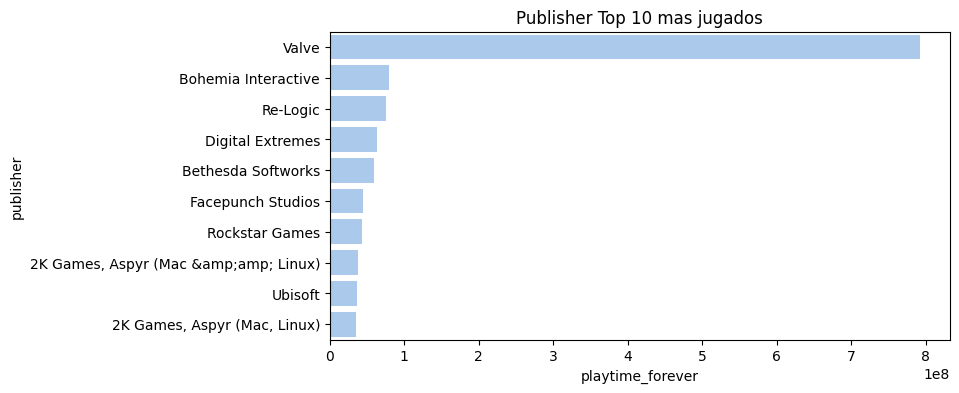

In [99]:
#graficamos 
f, ax = plt.subplots(figsize=(8, 4))
sns.set_color_codes("pastel")
sns.barplot(x="playtime_forever", y="publisher", data=top_publisher.head(10),
             color="b")
ax.set_title('Publisher Top 10 mas jugados')
plt.show()

Hay una gran diferencia entre publisher se nota una gran preferencia por los videjuegods de valve

Revisemos si hay outliert en la columna plytime_forever

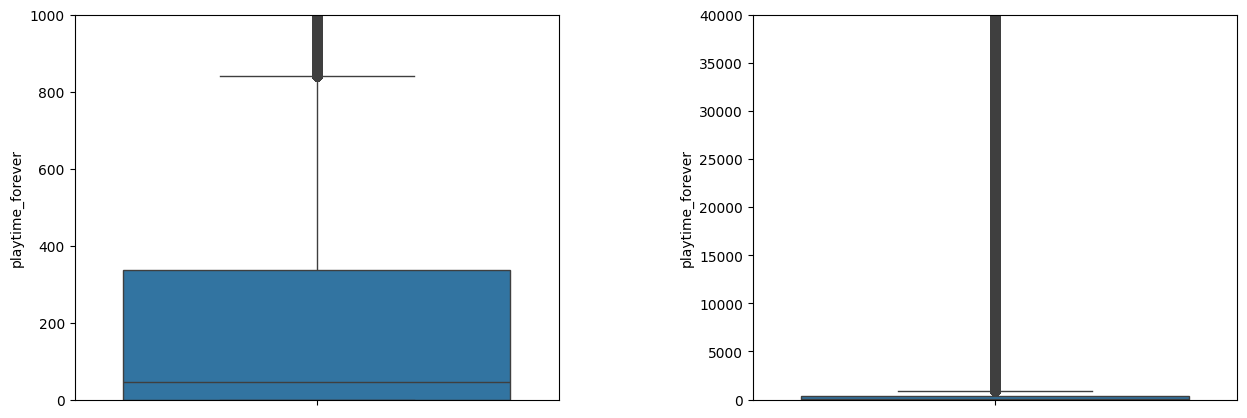

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_merge, y='playtime_forever', ax=ax[0])
sns.boxplot(data=df_merge, y='playtime_forever', ax=ax[1])
ax[0].set_ylim(0, 1000)
ax[1].set_ylim(0, 40000)


plt.subplots_adjust(wspace=0.4)
plt.show()

es evidente que hay muchos outliers, en horas jugadas puede ser pisoble este comportamiento ya que el tiempo dedicado a los videojuegos pude variar entre usuarios

revisemos la columna price

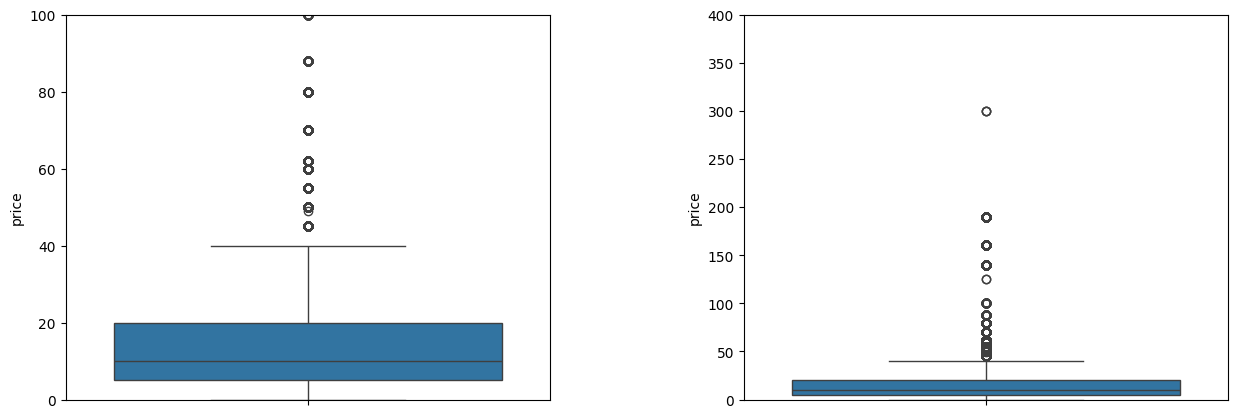

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_merge, y='price', ax=ax[0])
sns.boxplot(data=df_merge, y='price', ax=ax[1])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 400)


plt.subplots_adjust(wspace=0.4)
plt.show()

Evidentemente tambien encontramos outliers, esto puede ser normal ya que en este gremio los precios puden variar mucho, por lo tal no parece ser un error

Ahora busquemos una correlacion entre el precio y las horas jugadas

In [47]:
corr_playtime_price = df_merge.groupby(['title','price'])['playtime_forever'].sum().reset_index()

In [48]:
from sklearn.preprocessing import StandardScaler
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las variables price y la suma de playtime_forever
scaled_price = scaler.fit_transform(df_merge[['price']])
scaled_playtime = scaler.fit_transform(df_merge[['playtime_forever']])

In [49]:
# Convertir las variables escaladas en DataFrames de pandas
df_scaled_price = pd.DataFrame(scaled_price, columns=['scaled_price'])
df_scaled_playtime = pd.DataFrame(scaled_playtime, columns=['scaled_playtime'])

In [50]:
# Concatenar los DataFrames de las variables escaladas
df_scaled = pd.concat([df_scaled_price, df_scaled_playtime], axis=1)

In [51]:
# Calcular la matriz de correlación entre las variables escaladas
corr_matrix = df_scaled.corr()

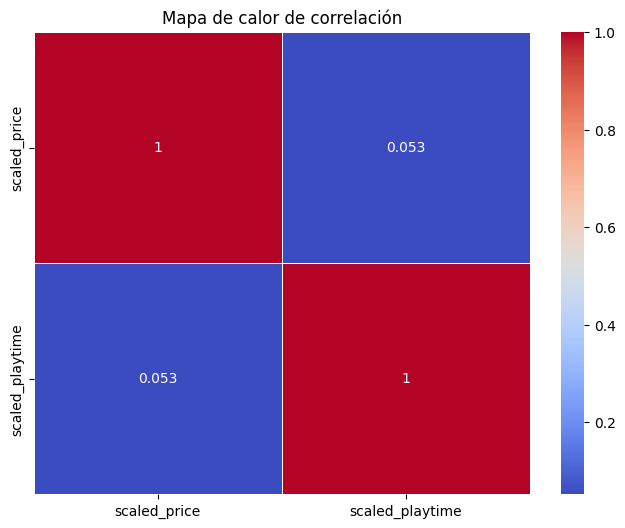

In [52]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de calor de correlación')
plt.show()

Al verificar la correlación podemos entender que no existe correlación entre el precio y las horas jugadas, esto no ayuda a entender mejor los outlier de la columna price 

Para finalisar Verifiquemos el precio de los 10 juejos mas jugados y de los 10 juegos mas costosos 

In [53]:
top_price = df_merge.groupby(['title', 'price'])['playtime_forever'].sum().reset_index()

In [54]:
sort_price =top_price.sort_values('price', ascending=False).head(10)#ordenamos por precio

In [55]:
sort_playtime =top_price.sort_values('playtime_forever', ascending=False).head(10)

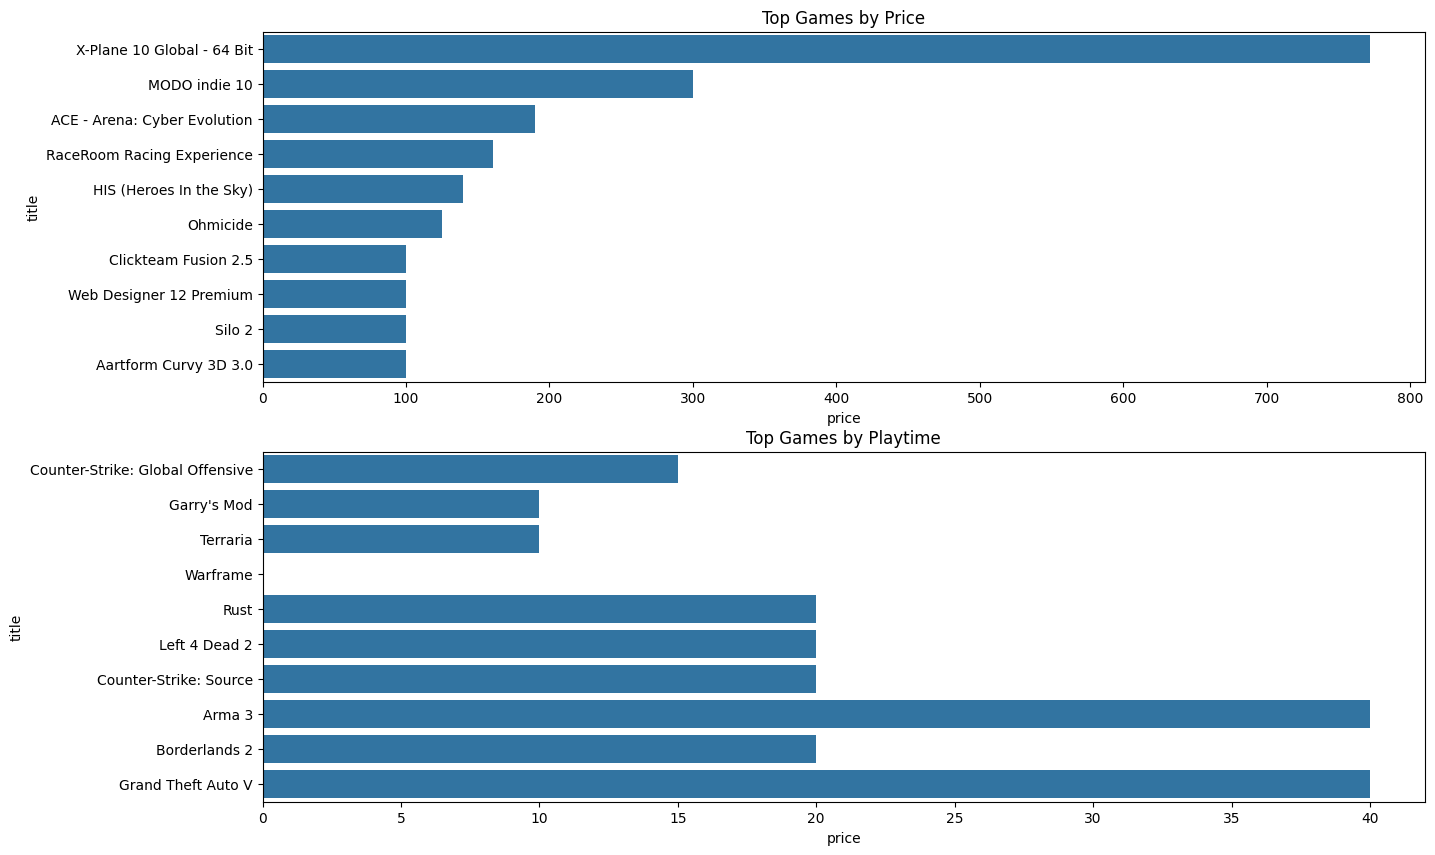

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(data=sort_price, x='price', y='title', ax=ax[0])
sns.barplot(data=sort_playtime, x='price', y='title', ax=ax[1])

# Añadir títulos a cada gráfico
ax[0].set_title('Top Games by Price')
ax[1].set_title('Top Games by Playtime')

plt.subplots_adjust(wspace=0.4)
plt.show()

Estas gráficas nos permiten visualizar la falta de correlación entre las horas jugadas y el precio de los videojuegos, al analizar los 10 videojuegos más jugados junto con los 10 más costosos.